# Wild Fires Project

### Data Cleaning

In [119]:

import pandas as pd
import datetime as dt
import re

def fct1(chemin, i):
    df = pd.read_csv(chemin, skiprows = i, delimiter = ";")
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace("'", '_').astype(str)
    df["Année"] = df["Année"].astype("Int64")
    df["Numéro"] = df["Numéro"].astype("Int64")
    df["Type_de_feu"] = df["Type_de_feu"].astype("Int64")
    df["Origine_de_l_alerte"] = df["Origine_de_l_alerte"].astype("Int64")
    df["Surface_parcourue_(m2)"] = df["Surface_parcourue_(m2)"].astype("Int64")
    df["Commune"] = df["Commune"].fillna("No Commune")
    df["Lieu-dit"] = df["Lieu-dit"].fillna("No Lieu-dit")
    df["Commune"] = df["Commune"].str.title()
    df["Lieu-dit"] = df["Lieu-dit"].str.title()
    date = []
    heure = []
    x = []
    for i in range(len(df["Alerte"])):
        x.append(re.split("\s", str(df["Alerte"][i])))
    for i in range(len(x)):
        date.append(x[i][0])
        heure.append(x[i][1])
    df = df.assign(date = date)
    df = df.assign(heure = heure)
    df = df.rename(columns = {'Surface_parcourue_(m2)':'Surface_parcourue'})
    df["Surface_parcourue"] = df["Surface_parcourue"] / 10000
    df = df.drop("Alerte", axis=1)
    df = df.drop("Numéro", axis=1)
    
    return df

In [120]:
df = fct1("C:/Users/33698/Documents/M2 EBDS/cours/data/liste_incendies_ du_12_08_2022.csv", 2)

In [121]:
df.head(10)

,Année,Numéro,Type_de_feu,Département,Code_INSEE,Commune,Lieu-dit,Code_du_carreau_DFCI,Origine_de_l_alerte,Surface_parcourue,date,heure
0,2022,5307,0,04,04152,Pierrevert,Avenue De La Milière,KD66H7,3,0.005,2022-08-11,05:42:00
1,2022,5277,0,06,06074,Lantosque,Saint Colomban,MD08A8,3,0.004,2022-08-10,15:02:00
2,2022,5275,0,30,30189,Nîmes,No Lieu-Dit,HD46K83,<NA>,0.05,2022-08-09,19:25:00
3,2022,5194,0,2B,2B123,Ghisonaccia,Foret De Pinia,NB88F8,<NA>,0.04,2022-08-09,11:13:00
4,2022,5268,0,30,30243,Saint-Christol-Lès-Alès,No Lieu-Dit,HD28K92,<NA>,0.5,2022-08-09,06:53:00
5,2022,5075,0,04,04152,Pierrevert,Impasse Saint Michel,KD66H6,3,0.1,2022-08-08,20:57:00
6,2022,5125,0,2B,2B366,Chisa,Via Ferratta,NB68K1,<NA>,0.0005,2022-08-08,18:36:00
7,2022,5124,0,2B,2B229,Pietroso,Punta Della Gavina,NC60G3,<NA>,0.0005,2022-08-08,18:03:00
8,2022,5122,0,2B,2B023,Asco,Piste Valentinu,NC42C6,<NA>,0.0005,2022-08-08,14:04:00
9,2022,5087,0,2B,2B124,Ghisoni,Marmano,NB68F8,<NA>,0.0001,2022-08-07,22:04:00


### Function that counts the number of fires per department 

In [122]:
import numpy as np

def function1():
    dep = input('Enter the department on which you wanna count the number of fires:')
    y = input('Enter the year associate:')
    dep = str(dep)
    y = int(y)
    if (dep == 'all'):
        return print('the total number of fires in France in the year', y, 'is :\n', np.count_nonzero(df["Année"] == y))
    else :
        return print('the total number of fires in France in the year', y, ' in the department ', dep, ' is :\n', np.count_nonzero((df["Département"] == dep) & (df["Année"] == y)))

In [123]:
function1()

Enter the department on which you wanna count the number of fires:13
Enter the year associate:2020
the total number of fires in France in the year 2020  in the department  13  is :
 244


### Function that compute the burnt area per department and year

In [124]:
def function2():
    dep = input('Enter the department on which you wanna sum the burnt area:')
    y = input('Enter the year associate:')
    dep = str(dep)
    y = int(y)
    if (dep == 'all'):
        return print('the burnt area total of the France in the year', y, 'is :\n', df.loc[(df['Année'] == y), 'Surface_parcourue'].sum(), 'ha')
    else:
        return print('the burnt area total of the department', dep,'in the year', y, 'is :\n', df.loc[(df['Année'] == y) & (df['Département'] == dep) , 'Surface_parcourue'].sum(), 'ha')
    

In [67]:
function2()

Enter the department on which you wanna sum the burnt area:all
Enter the year associate:2021
the burnt area total of the France in the year 2021 is :
 10606.330800000002 ha


### Function that asks the user for a department, and print the fires informations corresponding

In [68]:
def function3():
    dep = input('Enter the department on which you wanna see some descriptive statistics of the burnt area:')
    y = input('Enter the year associate:')
    dep = str(dep)
    y = int(y)
    if (dep == 'all'):
        return print('The Q1, median, Q3 of the burnt area in France of the year', y, 'is :\n', df.loc[df['Année'] == y, 'Surface_parcourue'].quantile(q=[0.25, 0.5, 0.75]), '\n\nThe mean of the same year is :\n', df.loc[df['Année'] == y, 'Surface_parcourue'].mean(), 'ha')
    else:
        return print('The Q1, median, Q3 of the burnt area in the department', dep, 'of the year', y, 'is :\n', df.loc[(df['Année'] == y) & (df['Département']== dep), 'Surface_parcourue'].quantile(q=[0.25, 0.5, 0.75]),'\n\nThe mean of the same department and year is :\n', df.loc[(df['Année'] == y) & (df['Département']== dep), 'Surface_parcourue'].mean(), 'ha')

In [69]:
function3()


Enter the department on which you wanna see some descriptive statistics of the burnt area:13
Enter the year associate:2002
The Q1, median, Q3 of the burnt area in the department 13 of the year 2002 is :
 0.25    0.01
0.50    0.05
0.75     0.3
Name: Surface_parcourue, dtype: Float64 

The mean of the same department and year is :
 1.622348128342246 ha


In [129]:
def function2b(dep, y):
    return df.loc[(df['Année'] == y) & (df['Département'] == dep) , 'Surface_parcourue'].sum()

In [130]:
function2b('13', 2000)

1375.4279999999999

In [152]:
import matplotlib
import matplotlib.pyplot as plt

def function22():
    dep = input('Enter the department on which you wanna sum the evolution of the burnt area:')
    dep = str(dep)
    for y in range(2000, 2023):
        plot = plt.scatter(y, function2b(dep, y), color = 'orange')
    plt.xlabel("year")
    plt.ylabel("area burnt in ha")
    chemin2 = print('C:/Users/33698/Documents/M2 EBDS/cours/data/',dep,'_graph_over_years.jpg')
    plt.savefig(str(chemin2))
    return plot

Enter the department on which you wanna sum the evolution of the burnt area:13
C:/Users/33698/Documents/M2 EBDS/cours/data/ 13 _graph_over_years.jpg
None


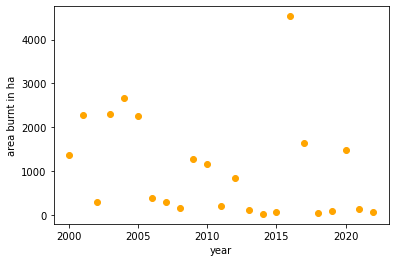

In [153]:
function22()

In [8]:
import Documents.M2_EBDS.cours.mypythonlib.myfunctions as mf

mf.function2()

Enter the department on which you wanna sum the burnt area:30
Enter the year associate:2017
the burnt area total of the department 30 in the year 2017 is :
 548.4858 ha


In [9]:
mf.function1()

Enter the department on which you wanna count the number of fires:13
Enter the year associate:2003
the total number of fires in France in the year 2003  in the department  13  is :
 350


In [10]:
mf.function3()

Enter the department on which you wanna see some descriptive statistics of the burnt area:84
Enter the year associate:2010
The Q1, median, Q3 of the burnt area in the department 84 of the year 2010 is :
 0.25    0.1
0.50    0.2
0.75    0.3
Name: Surface_parcourue, dtype: Float64 

The mean of the same department and year is :
 0.2854 ha
